In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Arbitrary interval width discretization with pandas

First we need to determine the interval edges or limits.

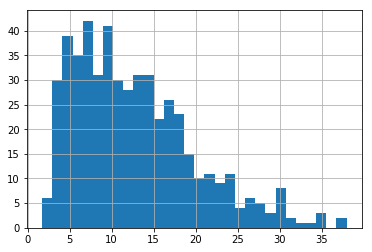

In [3]:
# let's plot a histogram to understand the value range of 
#the variable LSTAT

data['LSTAT'].hist(bins=30)

In [4]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 10, 20, 30, np.Inf]

# bin labels - we will use with pandas cut()
labels = ['0-10', '10-20', '20-30', '>30']

In [5]:
# discretize LSTAT

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
data['lstat_labels'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
data['lstat_intervals'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(data[['LSTAT', 'lstat_labels', 'lstat_intervals']].head())

   LSTAT lstat_labels lstat_intervals
0   4.98         0-10  (-0.001, 10.0]
1   9.14         0-10  (-0.001, 10.0]
2   4.03         0-10  (-0.001, 10.0]
3   2.94         0-10  (-0.001, 10.0]
4   5.33         0-10  (-0.001, 10.0]


In [6]:
# let's check the number of observations per bin

data['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64